## Aula 5 - Estatística Descritiva e Gráficos

In [ ]:
### Conceitos básicos de Estatística Descritiva

In [25]:
import pandas as pd
import numpy as np

In [26]:
#### Variaveis categóricas

In [27]:
# Categorias são inferidas a partir dos dados e são não ordenadas
from numpy.random import choice as ch
weekdays = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom']
df = pd.DataFrame({'Bairro1': ch(weekdays, 50), 
                   'Bairro2': ch(weekdays, 50)}, dtype ="category")
df.dtypes

Bairro1    category
Bairro2    category
dtype: object

In [29]:
df.head()

,Bairro1,Bairro2
0,Qui,Sab
1,Dom,Qui
2,Sab,Ter
3,Sex,Ter
4,Sex,Qua


In [ ]:
# Também é possível converter os tipos de um dataframe para category
df = pd.DataFrame({'A': list('abca'), 'B': list('bccd')})
df_cat = df.astype('category')
df_cat.dtypes

In [39]:
# Criando dados categóricos ordenados
from pandas.api.types import CategoricalDtype
s = pd.DataFrame({'Bairro1': ch(weekdays, 50), 
                  'Bairro2': ch(weekdays, 50)}, dtype ="category")
cat_type = CategoricalDtype(categories=["Seg", "Ter", "Qua", 
                        "Qui", "Sex", "Sab", "Dom"], ordered=True)
s_cat = s.astype(cat_type)

In [38]:
s_cat[s_cat['Bairro1'] > 'Qui'].head()

,Bairro1,Bairro2
1,Dom,Qua
3,Sex,Ter
4,Sex,Qui
7,Sab,Qua
8,Sab,Qui


In [ ]:
#### Amostragem

In [43]:
df = pd.DataFrame({'num_legs': [2, 4, 8, 0, 4, 2, 2],
                   'num_wings': [2, 0, 0, 0, 0, 2, 2],
                   'num_specimen_seen': [10, 2, 1, 8, 15, 6, 14]},
                  index=['falcon', 'dog', 'spider', 'fish','cow', 'crow', 'pigeon'])
df

,num_legs,num_wings,num_specimen_seen
falcon,2,2,10
dog,4,0,2
spider,8,0,1
fish,0,0,8
cow,4,0,15
crow,2,2,6
pigeon,2,2,14


In [44]:
# Criar, com o método sample, uma amostra aleatória de 3 elementos com um 
# estado aleatório conhecido. O estado aleatorio é utilizado para assegurar
# reproducibilidade de um experimento.
df['num_legs'].sample(n=3, random_state=10)

spider    8
pigeon    2
falcon    2
Name: num_legs, dtype: int64

In [45]:
# Criar uma amostra aleatoria com 50% dos elementos, estado aleatório conhecido e 
# com reposição
df.sample(frac=0.5, replace=True, random_state=1)

,num_legs,num_wings,num_specimen_seen
crow,2,2,6
fish,0,0,8
cow,4,0,15
falcon,2,2,10


In [ ]:
# Pode-se fazer um upsample, mas o parâmetro replace deve ser True
df.sample(frac=2, replace=True, random_state=1)

In [47]:
# Histograma
mm = 168 # média 
sigmam = 5 # desvio padrão
samples = 500
np.random.seed(0)
altura_m = np.random.normal(mm, sigmam, samples).astype(int)

mh = 176 # média
sigmah = 6 # desvio padrão
sample = 500
np.random.seed(1)
altura_h = np.random.normal(mh, sigmah, sample).astype(int)
df_altura = pd.DataFrame({'altura_h': altura_h, 'altura_m': altura_m})
df_altura.head()

,altura_h,altura_m
0,185,176
1,172,170
2,172,172
3,169,179
4,181,177


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018303992F70>,
      dtype=object)

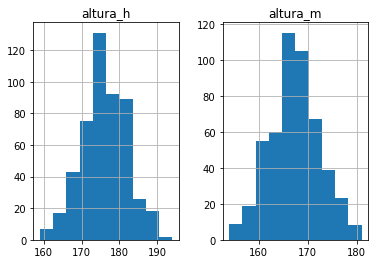

In [48]:
# Criar o histograma dos dados no dataframe df_altura
df_altura.hist()

In [ ]:
# Criar o histograma dos dados no dataframe df_altura especificando a quantidade de bins 
df_altura.hist(bins=20)

In [ ]:
#### Mediana

In [ ]:
# Considere o seguinte dataframe  
df = pd.DataFrame({"a":[112, 42, 5, 1, 1, 1, 1, 2, 7,8], 
                   "b":[37, 42, 5424, 311, 5345, 1234, 9098, 1, 5, None],  
                   "c":[210, 416, 114, None, 8, 5, 6, 23, 67, 234],  
                   "d":[144, 23, 1, 45, 890, 1, 234, 43, 12, 62]}) 
df

In [ ]:
# Calcule a mediana dos valores das colunas (axis=0)
df.median(axis = 0, skipna = True) 

In [ ]:
#### Quartis

In [49]:
# Considere o seguinte dataframe do PIB dos municípios
path_pib = 'https://github.com/alexlopespereira/curso_ciencia_dados2021/raw/master/data/originais/pib/pib_municipios.xlsx'
df_pib = pd.read_excel(path_pib, skiprows=3, skipfooter=1, 
                       dtype={'Unnamed: 1': str, '2007': str}) 

# Descobrindo porque ocorre um erro ao se tentar ler a coluna 2007 como numero 
df_pib.loc[df_pib['2007'].apply(len) < 4,'2007']
# É porque os valores NA estão representados por ...
# Ler novamente o dataset especificando a string de NA
df_pib = pd.read_excel(path_pib, skiprows=3, skipfooter=1, na_values='...',
                       dtype={'Unnamed: 1': str, '2007': float, '2009': float, '2011': float})

df_pib.rename(columns={'Unnamed: 0': 'nivel', 'Unnamed: 1': 'cod_ibge7', 
                           'Unnamed: 2': 'municipio'}, inplace=True)

In [50]:
# Calcular os quartis 0.25, .5, .75 e o percentil 0.9 do dataframe do PIB em todos os
#   anos presentes no dataset.
quartis = df_pib.quantile([.25, .5, .75, .9])
quartis

,2007,2009,2011,2013,2015,2017
0.25,29649.0,37345.0,47401.0,59200.0,69344.00,79101.50
0.50,62828.0,79822.0,103029.0,130580.5,153323.00,176621.50
0.75,162696.5,206897.0,277615.0,345766.0,407994.25,470221.25
0.90,565636.1,683915.8,900978.8,1155242.4,1314377.80,1496154.70


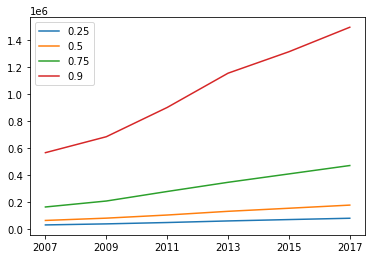

In [51]:
# Plotar num gráfico de linhas os percentis ao longo dos anos
# quartis.T retorna o dataframe transposto 
quartis.T.plot()

In [ ]:
# Plote o boxplot de cada um dos anos ['2017', '2013', '2011'] do dataset do PIB
df_pib.boxplot(column=['2017', '2013', '2011'])

### Gráficos com Seaborn

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Biblioteca para plotar gráficos
import seaborn as sns # Biblioteca para plotar gráficos baseada no matplotlib

#### Dataset tips

In [69]:
sns.set() # Ajusta valor padrão de tema, escala e paleta de cor
# Considere dataset de gorgetas a seguir
tips = sns.load_dataset("tips") 
# Mostre as primeiras linhas do dataframe tips
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


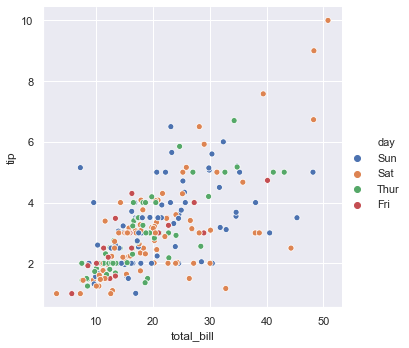

In [5]:
# Criar um scatter plot com o dado da gorgeta (tip) no eixo y, o total da conta (total_bill) no eixo x
#    e o dia da semana (day) representado em cores diferentes no gráfico. Para definir as cores use o parâmetro
#    hue.
sns.relplot(x="total_bill", y="tip", hue="day", data=tips)


#### Dataset frmi

In [6]:
# Considere o seguinte dataframe
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


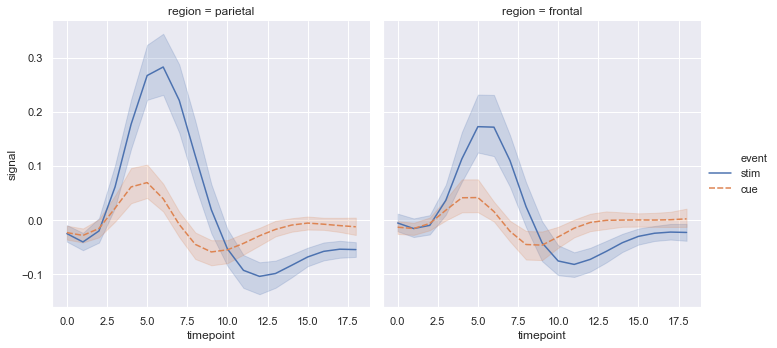

In [7]:
# Crie um gráfico de linhas especificando no eixo x a variável timepoint, no eixo y a variável signal,
#   na separação em gráficos distintos (argumento col) utilize a variável region, nas cores e estilo utilize a 
#   variável event.
sns.relplot(x="timepoint", y="signal", col="region",
            hue="event", style="event",
            kind="line", data=fmri);

#### Gráfico de Violino (Violin plot)

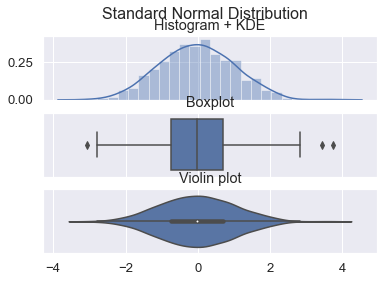

In [83]:
# Considere o seguinte método que traça 3 gráfciso: um histograma, um boxplot e um gráfico de violino
# Fonte: https://towardsdatascience.com/violin-plots-explained-fb1d115e023d
def plot_comparison(x, title):
    fig, ax = plt.subplots(3, 1, sharex=True)
    sns.distplot(x, ax=ax[0])
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1])
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2])
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.show()

sample_gaussian = np.random.normal(size=1000)
plot_comparison(sample_gaussian, 'Standard Normal Distribution')

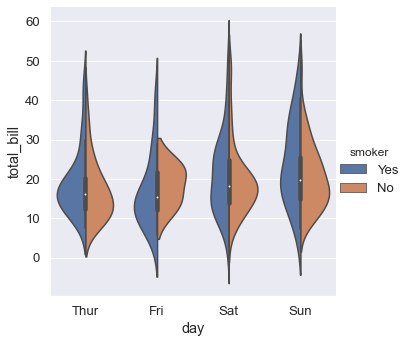

In [84]:
# Crie um gráfico de violino do dataset de gorjetas (tips) colocando na viariável x o dia da semana (day),
#     no eixo y o total da conta (total_bill), desagregue por fumante (smoker) representando a desagregação por
#     cores distintas. Use o argumento split=True para colocar num mesmo violino os dados referentes às duas
#     categorias de smoker (Yes e No).
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="violin", split=True, data=tips);

#### Gráfico de Barras

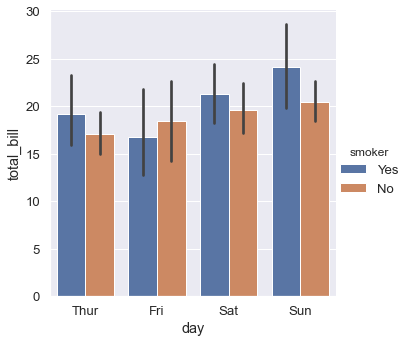

In [85]:
# Crie um gráfico categórico colocando no eixo x o dia da semana (day), no eixo y a média de total_bill,
#      e a desagregação por cor da variável smoker.
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="bar", data=tips);

#### pairplot (pares de gráficos)

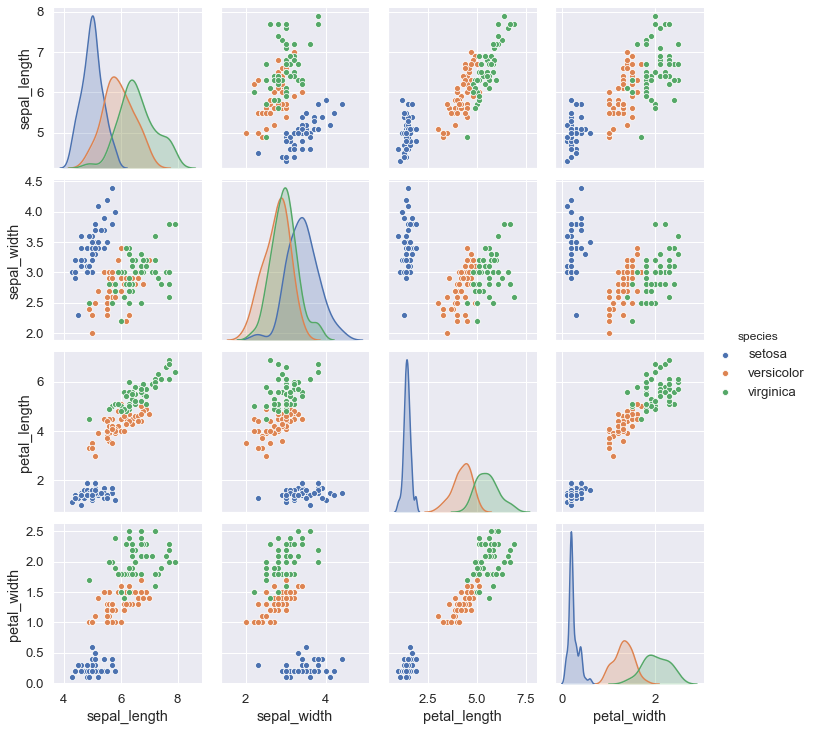

In [86]:
# Considere o dataframe a seguir carregado a partir do dataset iris
iris = sns.load_dataset("iris")
# Plote um conjunto de gráficos de scatter plot de todas as combinações de todas as variáveis do dataframe,
#     desagregando em cores as diferentes espécies. Esse tipo de gráfico no Seaborn é conhecido por pairplot.
sns.pairplot(data=iris, hue="species");

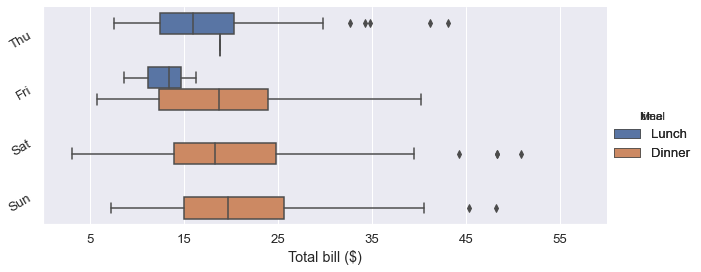

In [87]:
# Altere a escala da fonte para 1.2 usando o método sns.set()
sns.set(font_scale=1.2)
# Crie um gráfico de caixas (boxplot) retornando para uma variável g. Use no eixo x o total_bill, em y o dia da
#      semana, desagregue pelo tipo de refeição (time) com cores diferentes. Ajuste a autura para 4, 
#      o aspect para 2.
g = sns.catplot(x="total_bill", y="day", hue="time",
                height=4, aspect=2,
                kind="box", data=tips);

# Altere a legenda do gráfico para Meal
g.add_legend(title="Meal")
# Altere o label do eixo x para "Total bill ($)"
g.set_axis_labels("Total bill ($)", "")
# Altere os valores dos ticks no eixo y para ["Thu", "Fri", "Sat", "Sun"]. E ajuste os limites inferior e 
#      superior do eixo x para o seguinte intervalo xlim=(0, 60)
g.set(xlim=(0, 60), yticklabels=["Thu", "Fri", "Sat", "Sun"])
# Ajuste os ticks no eixo x para [5, 15, 25, 35, 45, 55]
g.ax.set_xticks([5, 15, 25, 35, 45, 55]);
# Rotacione em 30 graus a orientação das legendas do eixo y.
plt.setp(g.ax.get_yticklabels(), rotation=30);